# Risk Management in Financial Portfolio

In [184]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [185]:
import numpy as np
import pandas as pd

#Plotting and Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import yfinance as yf
from scipy.stats import kstest, norm, t, laplace , cauchy

In [186]:
import platform
print(f"Python version: {platform.python_version()}")
print(f"numpy version: {np.__version__}")
print(f"panda version: {pd.__version__}")
print(f"seaborn version: {sns.__version__}")
import matplotlib
print(f"matplotlib version: {matplotlib.__version__}")
import statsmodels
print(f"statsmodel version: {statsmodels.__version__}")
import scipy
print(f"scipy version: {scipy.__version__}")

Python version: 3.10.14
numpy version: 1.22.1
panda version: 2.0.3
seaborn version: 0.13.2
matplotlib version: 3.7.5
statsmodel version: 0.14.1
scipy version: 1.7.3


In [187]:
def getStockData(stocks, start, end):
    stockData =  yf.download(stocks, start=start, end=end)
    stockData = stockData['Adj Close']
    return stockData

def getReturnData(stockData):
    returns =np.log(stockData / stockData.shift(1))
    # Dropping NaN values resulting from the shift
    returns = returns.dropna()
    return returns

In [188]:
# https://www.troweprice.com/personal-investing/tools/fund-research/PRCOX
#PRCOX	U.S. Equity Research Fund 	5	Risk Potential=Moderate
# https://www.troweprice.com/personal-investing/tools/fund-research/PREIX
#PREIX	Equity Index 500 Fund 	4	Moderate
# https://www.troweprice.com/personal-investing/tools/fund-research/POMIX
#POMIX	Total Equity Market Index Fund 	3	Moderate
# https://www.troweprice.com/personal-investing/tools/fund-research/PRDGX
#PRDGX	Dividend Growth Fund 	3	Moderate


# Import data
stockList = ['POMIX','PRCOX','PRDGX','PREIX']

endDate = "2024-12-01"
startDate = "2020-01-01"

stockData = getStockData(stockList, start=startDate, end=endDate)

[*********************100%%**********************]  4 of 4 completed


In [189]:
stockData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2020-01-02 to 2024-11-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POMIX   1237 non-null   float64
 1   PRCOX   1237 non-null   float64
 2   PRDGX   1237 non-null   float64
 3   PREIX   1237 non-null   float64
dtypes: float64(4)
memory usage: 48.3 KB


In [190]:
stockData.tail()

Ticker,POMIX,PRCOX,PRDGX,PREIX
Date,,,,
2024-11-22,64.410004,59.400002,83.260002,157.270004
2024-11-25,64.680000,59.540001,83.790001,157.740005
2024-11-26,64.949997,59.950001,84.089996,158.649994
2024-11-27,64.720001,59.700001,84.089996,158.059998
2024-11-29,65.070000,60.070000,84.370003,158.960007


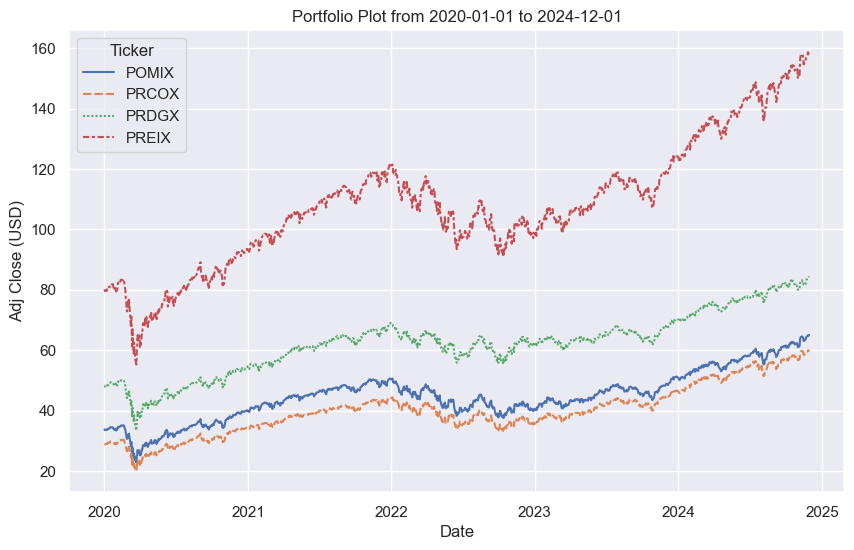

In [191]:
# Plotting in one graph
plt.figure(figsize=(10, 6))
sns.lineplot(stockData)

# Adding titles and labels
plt.title(f'Portfolio Plot from {startDate} to {endDate}')
plt.xlabel('Date')
plt.ylabel('Adj Close (USD)')

# Show the plot
plt.savefig('Portfolio.png')
plt.show()


In [192]:
returns = getReturnData(stockData)

returns.tail()

Ticker,POMIX,PRCOX,PRDGX,PREIX
Date,,,,
2024-11-22,0.005449,0.002697,0.006749,0.003503
2024-11-25,0.004183,0.002354,0.006345,0.002984
2024-11-26,0.004166,0.006863,0.003574,0.005752
2024-11-27,-0.003547,-0.004179,0.000000,-0.003726
2024-11-29,0.005393,0.006179,0.003324,0.005678


In [193]:
# Weights based on Overall Morningstar Rating (stars) As of 11/30/2024
weights = [3,5,3,4]
weights /= np.sum(weights)
print(weights)
returns['portfolio'] = returns.dot(weights)

[0.2        0.33333333 0.2        0.26666667]


In [194]:
returns.tail()

Ticker,POMIX,PRCOX,PRDGX,PREIX,portfolio
Date,,,,,
2024-11-22,0.005449,0.002697,0.006749,0.003503,0.004273
2024-11-25,0.004183,0.002354,0.006345,0.002984,0.003686
2024-11-26,0.004166,0.006863,0.003574,0.005752,0.005369
2024-11-27,-0.003547,-0.004179,0.000000,-0.003726,-0.003096
2024-11-29,0.005393,0.006179,0.003324,0.005678,0.005317


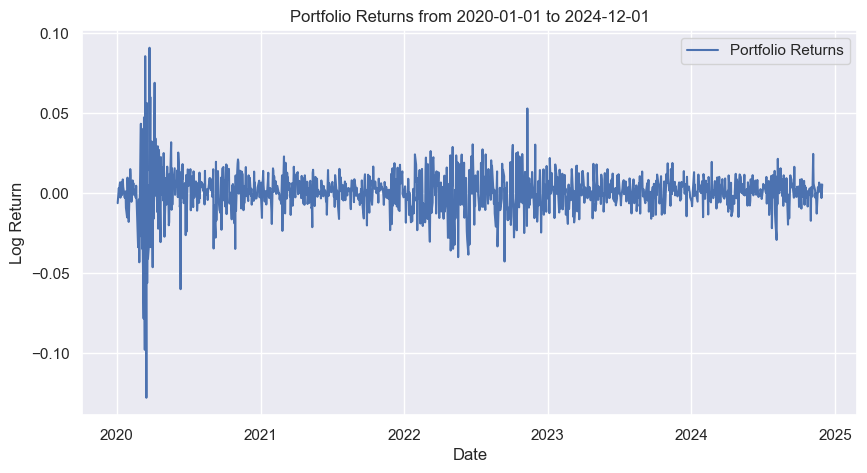

In [195]:
# Plot the returns
plt.figure(figsize=(10, 5))
plt.plot(returns['portfolio'], label='Portfolio Returns')
plt.title(f'Portfolio Returns from {startDate} to {endDate}')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.savefig('Portfolio Log Return.png')

# Show the plot
plt.show()

Maximum Drawdown: -36.25% over a given period from 2020-01-01 to 2024-12-01


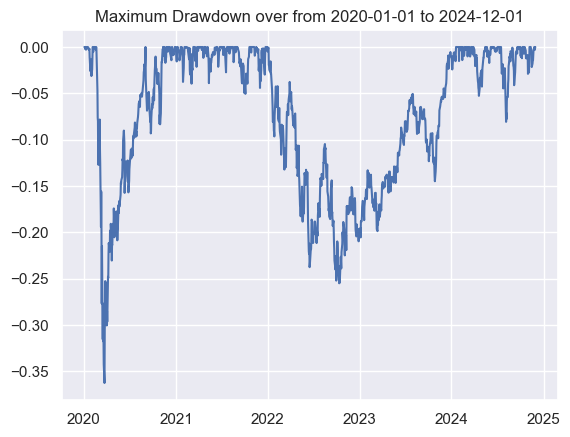

In [196]:
def calculate_max_drawdown(portfolio_returns):
    """
    Calculate the maximum drawdown of a series of returns.
    
    Parameters:
    returns (list or numpy array): A series of periodic returns.
    
    Returns:
    float: The maximum drawdown as a percentage.
    """
    # Convert returns to numpy array if it's a list
    if isinstance(portfolio_returns, list):
        portfolio_returns = np.array(portfolio_returns)
    
    # Calculate cumulative returns
    cum_returns = (1 + portfolio_returns).cumprod()
    
    # Calculate running maximum
    running_max = np.maximum.accumulate(cum_returns)
    
    # Calculate drawdowns
    drawdowns = (cum_returns - running_max) / running_max
    
    # Find the maximum drawdown
    max_drawdown = np.min(drawdowns)
    
    return max_drawdown, drawdowns

# Example usage
max_dd, dd = calculate_max_drawdown(returns['portfolio'])
print(f"Maximum Drawdown: {max_dd:.2%} over a given period from {startDate} to {endDate}")

plt.plot(dd)
plt.title(f'Maximum Drawdown over from {startDate} to {endDate}')
plt.savefig('Max Drawdown.png')

plt.show()

In [197]:
from scipy.stats import kstest, norm, t, laplace, cauchy

# Dictionary to hold the distributions and their corresponding fit methods
distributions = {
    'Normal': norm,
    'T-distribution': t,
    'Laplace': laplace,
    'Cauchy': cauchy
}

# Significance level
alpha = 0.05

# Function to perform KS test for each column in the DataFrame
def ks_test_dataframe(col, distributions, alpha=0.05):
    results = {}
    for dist_name, dist in distributions.items():
        # Fit the distribution to the sample and get the parameters
        params = dist.fit(col)
        # Perform the KS test using the fitted parameters
        ks_stat, p_value = kstest(col, dist.cdf, args=params)
        # Determine if we reject or fail to reject the null hypothesis
        if p_value > alpha:
            results[dist_name] = f'Fail to reject H0 (p-value: {p_value:.4f}), Parameters: {params}'
        else:
            results[dist_name] = f'Reject H0 (p-value: {p_value:.4f}), Parameters: {params}'
    return results

# Perform the KS test for each column in the DataFrame
results = ks_test_dataframe(returns['portfolio'], distributions, alpha)

# Print the results
for dist, dist_results in results.items():
    print(f'Distribution: {dist} :\n {dist_results}')



Distribution: Normal :
 Reject H0 (p-value: 0.0000), Parameters: (0.0005404102485382532, 0.013315595967219967)
Distribution: T-distribution :
 Fail to reject H0 (p-value: 0.8610), Parameters: (2.9052622131863126, 0.0009730085542064711, 0.00776523553409251)
Distribution: Laplace :
 Fail to reject H0 (p-value: 0.3801), Parameters: (0.0008844304638757818, 0.008647754668317714)
Distribution: Cauchy :
 Reject H0 (p-value: 0.0010), Parameters: (0.0009228698252052831, 0.005541649133999186)


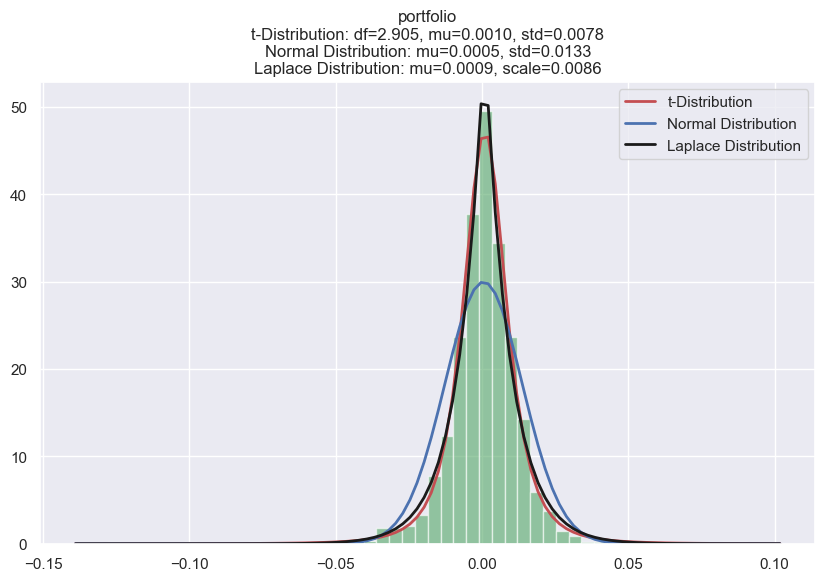

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, norm, laplace

def fit_distributions(stock_data, column):
    plt.figure(figsize=(10, 6))
        
    daily_return = stock_data[column]
    
    # Fit a t-distribution to the daily return data
    t_params = t.fit(daily_return)
    dfree, t_mu, t_std = t_params
    
    # Fit a Normal distribution to the daily return data
    norm_params = norm.fit(daily_return)
    norm_mu, norm_std = norm_params
    
    # Fit a Laplace distribution to the daily return data
    laplace_params = laplace.fit(daily_return)
    laplace_mu, laplace_b = laplace_params
    
    #print(f"{column} -> t-Distribution: df={dfree:.3f}, mu={t_mu:.4f}, std={t_std:.4f}")
    #print(f"{column} -> Normal Distribution: mu={norm_mu:.4f}, std={norm_std:.4f}")
    #print(f"{column} -> Laplace Distribution: mu={laplace_mu:.4f}, scale={laplace_b:.4f}")
    
    # Plot the histogram and the PDFs
    plt.hist(daily_return, bins=50, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    t_pdf = t.pdf(x, dfree, t_mu, t_std)
    norm_pdf = norm.pdf(x, norm_mu, norm_std)
    laplace_pdf = laplace.pdf(x, laplace_mu, laplace_b)
    
    plt.plot(x, t_pdf, 'r', linewidth=2, label='t-Distribution')
    plt.plot(x, norm_pdf, 'b', linewidth=2, label='Normal Distribution')
    plt.plot(x, laplace_pdf, 'k', linewidth=2, label='Laplace Distribution')
    
    title = f"{column}\nt-Distribution: df={dfree:.3f}, mu={t_mu:.4f}, std={t_std:.4f}\n"
    title += f"Normal Distribution: mu={norm_mu:.4f}, std={norm_std:.4f}\n"
    title += f"Laplace Distribution: mu={laplace_mu:.4f}, scale={laplace_b:.4f}"
    plt.title(title)
    plt.legend()
    plt.savefig('hist_plot.png')
    plt.show()


fit_distributions(returns, 'portfolio')


## Historical VaR
### Here we make no assumptions about the distribution of returns.

--- Risk Metrics Summary (Time Horizon: 100 Days, Investment: $10,000) ---
Expected Return (Mean): 0.0005
Standard Deviation (Volatility): 0.0133
VaR (5.0%): -18.38% | Monetary Loss: $1,838.487
CVaR (5.0%): -32.43% | Monetary Loss: $3,242.767


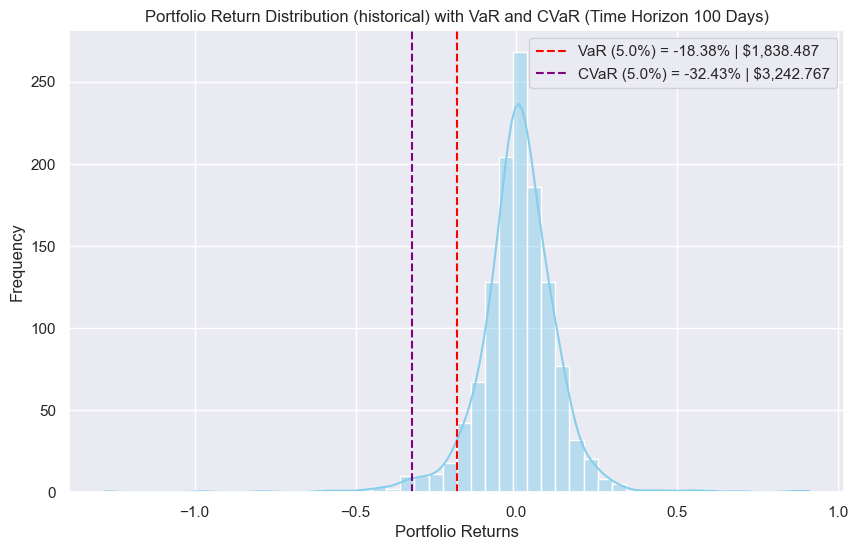

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate portfolio returns
#def portfolio_returns(asset_returns, weights):
#    return asset_returns.dot(weights)

# Function to scale returns for different time horizons
def scale_returns(portfolio_returns, time_horizon):
    """
    Scale returns for different time horizons using the square-root rule.
    :param returns: Array-like, historical returns
    :param time_horizon: Number of periods to scale (e.g., 1 day, 5 days, 30 days)
    :return: Scaled returns
    """
    return portfolio_returns * np.sqrt(time_horizon)

# Function to calculate Historical VaR
def historical_var(portfolio_returns, confidence_level=0.05, investment=1_000_000, time_horizon=1):
    scaled_returns = scale_returns(portfolio_returns, time_horizon)
    var_pct = np.percentile(scaled_returns, confidence_level * 100)
    var_amount = investment * abs(var_pct)
    return var_pct, var_amount

# Function to calculate Historical CVaR
def historical_cvar(portfolio_returns, confidence_level=0.05, investment=1_000_000, time_horizon=1):
    scaled_returns = scale_returns(portfolio_returns, time_horizon)
    var_pct, _ = historical_var(portfolio_returns, confidence_level, investment, time_horizon)
    cvar_pct = scaled_returns[scaled_returns <= var_pct].mean()
    cvar_amount = investment * abs(cvar_pct)
    return cvar_pct, cvar_amount

# Function to display risk metrics summary
def risk_summary(portfolio_returns, confidence_level=0.05, investment=1_000_000, time_horizon=1):
    var_pct, var_amt = historical_var(portfolio_returns, confidence_level, investment, time_horizon)
    cvar_pct, cvar_amt = historical_cvar(portfolio_returns, confidence_level, investment, time_horizon)
    mean_return = portfolio_returns.mean()
    std_dev = portfolio_returns.std()
    
    print(f"--- Risk Metrics Summary (Time Horizon: {time_horizon} Days, Investment: ${investment:,}) ---")
    print(f"Expected Return (Mean): {mean_return:.4f}")
    print(f"Standard Deviation (Volatility): {std_dev:.4f}")
    print(f"VaR ({confidence_level*100:.1f}%): {var_pct:.2%} | Monetary Loss: ${var_amt:,.3f}")
    print(f"CVaR ({confidence_level*100:.1f}%): {cvar_pct:.2%} | Monetary Loss: ${cvar_amt:,.3f}")
 

# Function to plot portfolio returns with VaR and CVaR
def plot_var_cvar(portfolio_returns, confidence_level=0.05, investment=1_000_000, time_horizon=1):
    scaled_returns = scale_returns(portfolio_returns, time_horizon)
    var_pct, var_amt = historical_var(portfolio_returns, confidence_level, investment, time_horizon)
    cvar_pct, cvar_amt = historical_cvar(portfolio_returns, confidence_level, investment, time_horizon)

    plt.figure(figsize=(10, 6))
    sns.histplot(scaled_returns, bins=50, kde=True, color='skyblue')

    # Plot VaR and CVaR
    plt.axvline(var_pct, color='red', linestyle='--', label=f'VaR ({confidence_level*100:.1f}%) = {var_pct:.2%} | ${var_amt:,.3f}')
    plt.axvline(cvar_pct, color='purple', linestyle='--', label=f'CVaR ({confidence_level*100:.1f}%) = {cvar_pct:.2%} | ${cvar_amt:,.3f}')

    plt.title(f'Portfolio Return Distribution (historical) with VaR and CVaR (Time Horizon {time_horizon} Days)')
    plt.xlabel('Portfolio Returns')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig('hist_var_cvar.png')
    plt.show()

# Example Calculation
initial_investment = 10000  # 10k
time_horizon = 100  # 100-day horizon
confidence_level = 0.05  # 5% for 95% confidence

risk_summary(returns['portfolio'], confidence_level, initial_investment, time_horizon)
plot_var_cvar(returns['portfolio'], confidence_level, initial_investment, time_horizon)


## Parametric VaR and CVaR
### Here we make an assumption on the distribution of returns and define parameters for the model.

--- Risk Metrics Summary (Time Horizon: 100 Days, Investment: $10,000) ---
VaR Monetary Loss over 100 days: $1754.69 (-17.55%)
CVaR Monetary Loss over 100 days: $3187.18 (-31.87%)


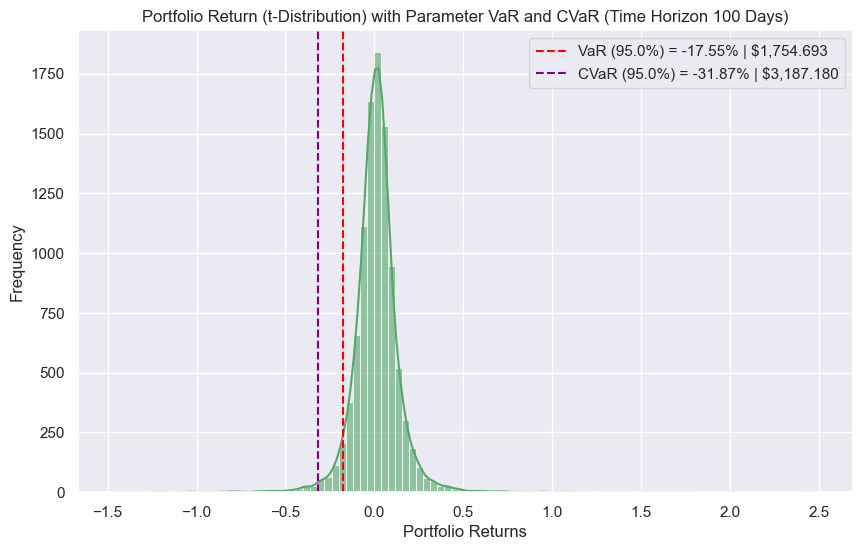

In [200]:
import numpy as np
import scipy.stats as stats

def parametric_var_cvar(portfolio_returns, confidence_level, time_horizon, initial_investment):
    # Parameters for the t-distribution
    df, mu, sigma = stats.t.fit(portfolio_returns)

    # VaR at the given confidence level
    var_value = stats.t.ppf(1 - confidence_level, df, mu, sigma) * np.sqrt(time_horizon)
    monetary_var = initial_investment * (var_value)
    var_percentage = var_value * 100  # VaR as a percentage

    # CVaR calculation
    cvar_value = (1 / (1 - confidence_level)) * stats.t.expect(
        lambda x: x,
        args=(df,), loc=mu, scale=sigma,
        lb=stats.t.ppf(confidence_level, df, mu, sigma)
    ) * np.sqrt(time_horizon)
    monetary_cvar = initial_investment * cvar_value
    cvar_percentage = cvar_value * 100  # CVaR as a percentage

    # Make CVaR value negative to reflect loss 
    monetary_cvar = -abs(monetary_cvar) 
    cvar_percentage = -abs(cvar_percentage)
    
    return monetary_var, var_percentage, monetary_cvar, cvar_percentage


confidence_level = 0.95  # 95% confidence level
time_horizon = 100  # 100 days
initial_investment = 10000  # Initial investment of $10,000

monetary_var, var_percentage, monetary_cvar, cvar_percentage = parametric_var_cvar(
    returns['portfolio'], confidence_level, time_horizon, initial_investment)

print(f"--- Risk Metrics Summary (Time Horizon: {time_horizon} Days, Investment: ${initial_investment:,}) ---")
print(f"VaR Monetary Loss over {time_horizon} days: ${-monetary_var:.2f} ({var_percentage:.2f}%)")
print(f"CVaR Monetary Loss over {time_horizon} days: ${-monetary_cvar:.2f} ({cvar_percentage:.2f}%)")


# Parameters for the t-distribution
df, mu, sigma = stats.t.fit(returns['portfolio'])



t_values = stats.t.rvs(df, loc=mu, scale=sigma, size=10000) * np.sqrt(time_horizon)
plt.figure(figsize=(10, 6))
sns.histplot(t_values, bins=100, alpha=0.6, color='g', kde=True)

# Plot VaR and CVaR
plt.axvline(var_percentage/100, color='red', linestyle='--', label=f'VaR ({confidence_level*100:.1f}%) = {var_percentage:.2f}% | ${-monetary_var:,.3f}')
plt.axvline(cvar_percentage/100, color='purple', linestyle='--', label=f'CVaR ({confidence_level*100:.1f}%) = {cvar_percentage:.2f}% | ${-monetary_cvar:,.3f}')

plt.title(f'Portfolio Return (t-Distribution) with Parameter VaR and CVaR (Time Horizon {time_horizon} Days)')
plt.xlabel('Portfolio Returns')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('para_var_cvar.png')
plt.show()

## Monte Carlo Simulation using t-distribution

Value at Risk (VaR) 12.49% at 95.0% confidence: $1,263.77
Conditional Value at Risk (CVaR) 18.89% at 95.0% confidence: $1,888.06


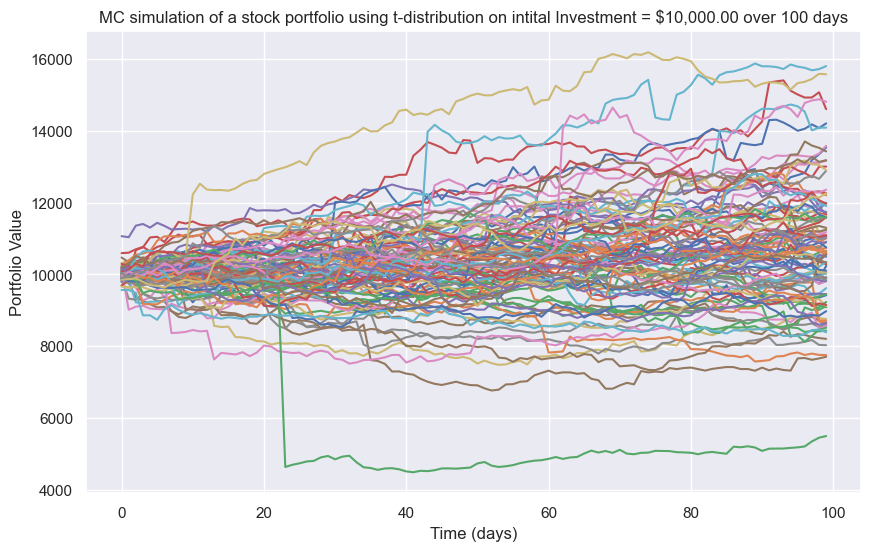

In [201]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def monte_carlo_simulation(initial_value, portfolio_returns, num_simulations, time_horizon):
    # Generate random returns from t-distribution
    dfree, mu, std = stats.t.fit(portfolio_returns)
    random_returns = stats.t.rvs(df=dfree, 
                                 loc=mu, 
                                 scale=std, 
                                 size=(num_simulations, time_horizon))
    
    # Calculate cumulative returns
    cumulative_returns = np.cumprod(1 + random_returns, axis=1)
    
    # Calculate portfolio values
    portfolio_values = initial_value * cumulative_returns
    
    return portfolio_values

def calculate_var_cvar(portfolio_values, confidence_level):
    final_values = portfolio_values[:, -1]
    sorted_values = np.sort(final_values)
    
    var_index = int(len(sorted_values) * (1 - confidence_level))
    var = initial_value - sorted_values[var_index] 
    
    cvar = initial_value - np.mean(sorted_values[:var_index])
    
    return var, cvar

def calculate_var_cvar_percentage(portfolio_values, confidence_level):
    final_returns = (portfolio_values[:, -1] - portfolio_values[:, 0]) / portfolio_values[:, 0]
    sorted_returns = np.sort(final_returns)
    
    var_index = int(len(sorted_returns) * (1 - confidence_level))
    var_percentage = -sorted_returns[var_index]
    
    cvar_percentage = -np.mean(sorted_returns[:var_index])
    
    return var_percentage, cvar_percentage

# Set parameters
initial_value = 10000  # Initial portfolio value
time_horizon = 100  # Number of trading days
num_simulations = 10000  # Number of Monte Carlo simulations
confidence_level = 0.95  # Confidence level for VaR and CVaR

# Run Monte Carlo simulation
portfolio_values = monte_carlo_simulation(initial_value, returns['portfolio'] , num_simulations, time_horizon)

# Calculate VaR and CVaR
var, cvar = calculate_var_cvar(portfolio_values, confidence_level)
var_percentage, cvar_percentage = calculate_var_cvar_percentage(portfolio_values, confidence_level)

# Print results
print(f"Value at Risk (VaR) {var_percentage:.2%} at {confidence_level*100}% confidence: ${var:,.2f}")
print(f"Conditional Value at Risk (CVaR) {cvar_percentage:.2%} at {confidence_level*100}% confidence: ${cvar:,.2f}")

# Plot some sample paths
plt.figure(figsize=(10, 6))
for i in range(100):  # Plot 100 sample paths
    plt.plot(portfolio_values[i])
plt.title(f"MC simulation of a stock portfolio using t-distribution on intital Investment = ${initial_value:,.2f} over {time_horizon} days")
plt.xlabel("Time (days)")
plt.ylabel("Portfolio Value")
plt.savefig('mc_path.png')
plt.show()


In [202]:
# Calculate monetary loss
monetary_VaR = initial_value * (1 - var_percentage)
monetary_CVaR = initial_value * (1 - cvar_percentage)
print(f"VaR (Monetary Loss at 95% Confidence): ${var:,.2f}")
print(f"CVaR (Average Loss beyond VaR): ${cvar:,.2f}")

VaR (Monetary Loss at 95% Confidence): $1,263.77
CVaR (Average Loss beyond VaR): $1,888.06


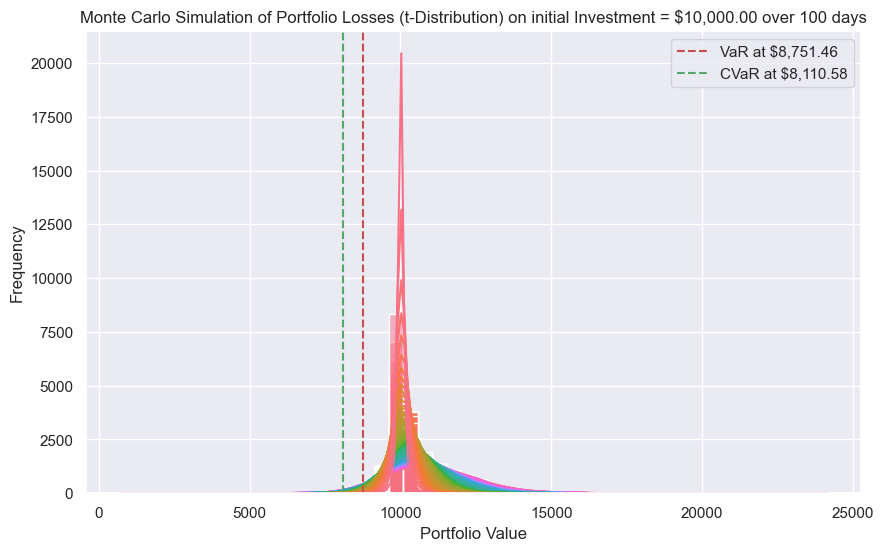

In [203]:
# Plot histogram of portfolio values
plt.figure(figsize=(10, 6))
sns.histplot(portfolio_values, bins=50, kde=True,  color='skyblue')
plt.axvline(monetary_VaR, color='r', linestyle='dashed', label=f'VaR at ${monetary_VaR:,.2f} ')
plt.axvline(monetary_CVaR, color='g', linestyle='dashed', label=f'CVaR at ${monetary_CVaR:,.2f}')
plt.title(f'Monte Carlo Simulation of Portfolio Losses (t-Distribution) on initial Investment = ${initial_value:,.2f} over {time_horizon} days')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('mc_var_cvar.png')
plt.show()